# DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION 
***TASK 1: Prediction using Supervised ML***

****Predict the percentage of a student based on the number of study hours.****

A simple Linear Regression task that involves two variables ie. hours and score 

## Importing the Header Files

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

## Get the data

In [7]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


## Exploratory data analysis

In [8]:
print(data.shape)
data.head(26)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualize the data

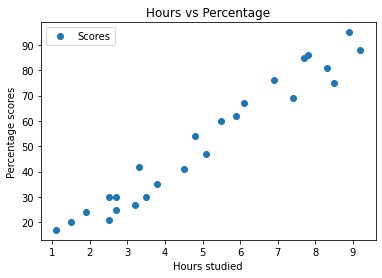

In [11]:
data.plot(x='Hours' , y='Scores' , style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scores')
plt.show()

In [12]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [13]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [14]:
hours=data['Hours']
scores=data['Scores']

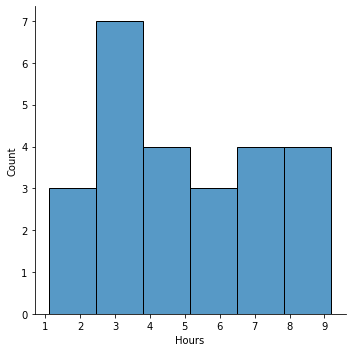

In [15]:
sn.displot(hours)

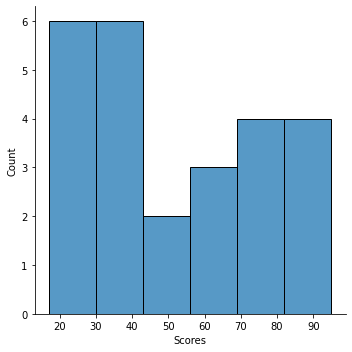

In [16]:
sn.displot(scores)

## Linear Regression

In [17]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

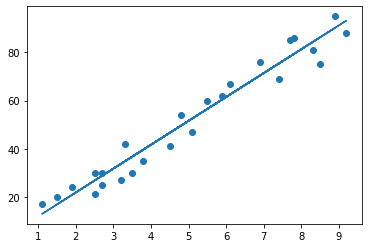

In [20]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x, line);
plt.show()

In [37]:
print("Training Score:", reg.score(x_train , y_train))
print("Test Score:" , reg.score(x_test , y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


In [41]:
print(x_test)
y_predict = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing actual vs prediction 

In [42]:
df = pd.DataFrame({'Actual' : y_test, 'Prediction' : y_predict})
df

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Making prediction for 9.25 hours 

In [48]:
h = 9.25
s = reg.predict([[h]])
print("If a student studied for {} hours per day he/she will score {} % in exam.".format(h,s))

If a student studied for 9.25 hours per day he/she will score [93.69173249] % in exam.


In [49]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_predict))
print("Explained Variance Score:", metrics.explained_variance_score(y_test, y_predict))
print("Maximum Error:" , metrics.max_error(y_test, y_predict))

Mean Absolute Error: 4.183859899002975
Explained Variance Score: 0.9482829156738147
Maximum Error: 6.732260779489849
